# Import Library

In [ ]:
# Data Manipilation & EDA
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np
import swifter
import time

# Data Visualization & EDA
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

# Data Processing
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
import nltk
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

#Modelling & Evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tugas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tugas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Understanding

Data yang digunakan berasal dari ulasan para pengguna aplikasi Triv (sebuah platform exchange). Data ini dikumpulkan secara otomatis dengan teknik web scraping menggunakan library google-play-scraper.

untuk code scrapping bisa dilihat pada file berikut : [Scrapping File](Scrapping.ipynb)

![Data Source](asset\dataunderstanding.png)

In [12]:
df = pd.read_csv('data/triv.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12665 entries, 0 to 12664
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12665 non-null  object
 1   userName              12665 non-null  object
 2   userImage             12665 non-null  object
 3   content               12665 non-null  object
 4   score                 12665 non-null  int64 
 5   thumbsUpCount         12665 non-null  int64 
 6   reviewCreatedVersion  9841 non-null   object
 7   at                    12665 non-null  object
 8   replyContent          401 non-null    object
 9   repliedAt             401 non-null    object
 10  appVersion            9841 non-null   object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


Dataset ini berisi 12665  entri ulasan aplikasi dengan 11 kolom. Semua ulasan memiliki reviewId, userName, userImage, content, score, dan thumbsUpCount yang lengkap. Tanggal ulasan (at) juga tersedia untuk semua entri. Namun, beberapa kolom memiliki data yang tidak lengkap, seperti reviewCreatedVersion dan appVersion, yang hanya terisi hanya 9841 baris. Selain itu, hanya 401 ulasan yang mendapat balasan dari pengembang, ditunjukkan oleh replyContent dan repliedAt. Hal ini menunjukkan bahwa sebagian besar ulasan tidak memiliki tanggapan resmi dari pihak aplikasi.

**Melihat sample data**

In [14]:
df.sample(10)

reviewId         userName  \
10082  06119a26-6a74-4432-9615-9596861f62ac  Pengguna Google   
7876   425cd017-6d42-4204-8632-6c3b43af589c  Pengguna Google   
5243   8ad90e76-38c4-4d88-80dd-c06fc12a1dfa  Pengguna Google   
3552   2927bafa-d4af-498e-8994-b0219dce6fdf  Pengguna Google   
7623   b9e906b3-6895-4f23-ad8a-0e2df8681b7b  Pengguna Google   
6858   7ada6a95-8ede-4201-bfca-057eb256cb8d  Pengguna Google   
3826   b9c7ffce-2cea-4963-a02e-737bfb8a58b0  Pengguna Google   
3891   2d7078e4-2d60-469e-884d-b15d66a6725e  Pengguna Google   
12205  272e57c0-6f37-440a-a5ed-6077441368d1  Pengguna Google   
2099   1f5e3f23-f9bb-4d2b-b7f8-9e99110db700  Pengguna Google   

                                               userImage  \
10082  https://play-lh.googleusercontent.com/EGemoI2N...   
7876   https://play-lh.googleusercontent.com/EGemoI2N...   
5243   https://play-lh.googleusercontent.com/EGemoI2N...   
3552   https://play-lh.googleusercontent.com/EGemoI2N...   
7623   https://play-lh.googleusercontent.com/EGemoI2N...   
6858   https://play-lh.googleusercontent.com/EGemoI2N...   
3826   https://play-lh.googleusercontent.com/EGemoI2N...   
3891   https://play-lh.googleusercontent.com/EGemoI2N...   
12205  https://play-lh.googleusercontent.com/EGemoI2N...   
2099   https://play-lh.googleusercontent.com/EGemoI2N...   

                                                 content  score  \
10082                            Kok logout sendiri sih?      1   
7876   Aplikasi ini sangat bagus cocok bintang 5 aja ...      5   
5243   Aplikasi nya ringan gak bikin lag, prosesnya m...      5   
3552   Lucu ada yang komen kyc 4 kali sedot saldo, hh...      5   
7623   Apk crypto Ter recommend lah pokoknya.. gilaaa...      5   
6858   Saya rasa update aplikasi terlalu sering, load...      3   
3826   Triv menjadi pilihan terbaik untuk memulai inv...      5   
3891   Aplikasi yang sangat bagus mudah di pahami dan...      5   
12205                                                👍👍👍      5   
2099   Aplikasi mantap bangat,mudah dalam mengunakann...      5   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
10082              0                  6.6  2022-07-28 10:42:09          NaN   
7876               0                6.2.1  2022-01-05 16:13:05          NaN   
5243               3                7.6.0  2024-09-17 07:05:06          NaN   
3552               0                7.8.6  2025-03-23 22:59:10          NaN   
7623               0                6.5.1  2022-05-05 21:10:42          NaN   
6858              14                7.6.5  2024-10-03 14:17:03          NaN   
3826               5                5.9.1  2021-08-30 20:14:11          NaN   
3891              19                7.3.4  2024-06-18 08:50:32          NaN   
12205              0                  3.4  2021-01-31 11:15:17          NaN   
2099               2                  6.3  2022-01-25 11:56:03          NaN   

      repliedAt appVersion  
10082       NaN        6.6  
7876        NaN      6.2.1  
5243        NaN      7.6.0  
3552        NaN      7.8.6  
7623        NaN      6.5.1  
6858        NaN      7.6.5  
3826        NaN      5.9.1  
3891        NaN      7.3.4  
12205       NaN        3.4  
2099        NaN        6.3

**Cek distribusi data**

In [15]:
df.describe(include='all')

reviewId         userName  \
count                                  12665            12665   
unique                                 12665                1   
top     41dff01f-cf34-4128-9369-aad8cc1a0d2e  Pengguna Google   
freq                                       1            12665   
mean                                     NaN              NaN   
std                                      NaN              NaN   
min                                      NaN              NaN   
25%                                      NaN              NaN   
50%                                      NaN              NaN   
75%                                      NaN              NaN   
max                                      NaN              NaN   

                                                userImage content  \
count                                               12665   12665   
unique                                                  1   12051   
top     https://play-lh.googleusercontent.com/EGemoI2N...      Ok   
freq                                                12665      72   
mean                                                  NaN     NaN   
std                                                   NaN     NaN   
min                                                   NaN     NaN   
25%                                                   NaN     NaN   
50%                                                   NaN     NaN   
75%                                                   NaN     NaN   
max                                                   NaN     NaN   

               score  thumbsUpCount reviewCreatedVersion                   at  \
count   12665.000000   12665.000000                 9841                12665   
unique           NaN            NaN                  164                12658   
top              NaN            NaN                8.0.4  2021-10-24 23:55:38   
freq             NaN            NaN                  520                    2   
mean        4.119542       3.256613                  NaN                  NaN   
std         1.558732      17.692770                  NaN                  NaN   
min         1.000000       0.000000                  NaN                  NaN   
25%         4.000000       0.000000                  NaN                  NaN   
50%         5.000000       0.000000                  NaN                  NaN   
75%         5.000000       2.000000                  NaN                  NaN   
max         5.000000     787.000000                  NaN                  NaN   

                                             replyContent  \
count                                                 401   
unique                                                363   
top     halo, pembayaran cashback shopeepay kami nonak...   
freq                                                    6   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                  repliedAt appVersion  
count                   401       9841  
unique                  401        164  
top     2021-09-23 12:04:31      8.0.4  
freq                      1        520  
mean                    NaN        NaN  
std                     NaN        NaN  
min                     NaN        NaN  
25%                     NaN        NaN  
50%                     NaN        NaN  
75%                     NaN        NaN  
max                     NaN        NaN

**Cek data duplikat**


In [16]:
print("Jumlah data duplikat : ", df.duplicated().sum())

Jumlah data duplikat :  0


**Cek data kosong**


In [17]:
print("Jumlah data kosong/null:\n",df.isna().sum())

Jumlah data kosong/null:
 reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     2824
at                          0
replyContent            12264
repliedAt               12264
appVersion               2824
dtype: int64


karena disini kita akan menggunakan 3 kolom saja untuk melakukan analisis sentimen, yaitu kolom :

* reviewId -> untuk id 
* content -> Sentimen pelanggan
* score -> untuk labellimg

maka dapat disimpulkan tidak ada nilai yang kosong pada data, dan kolom selain ketiga kolom di atas akan di hapus di tahap preprocessing. 

**Cek distribusi data yang digunakan**

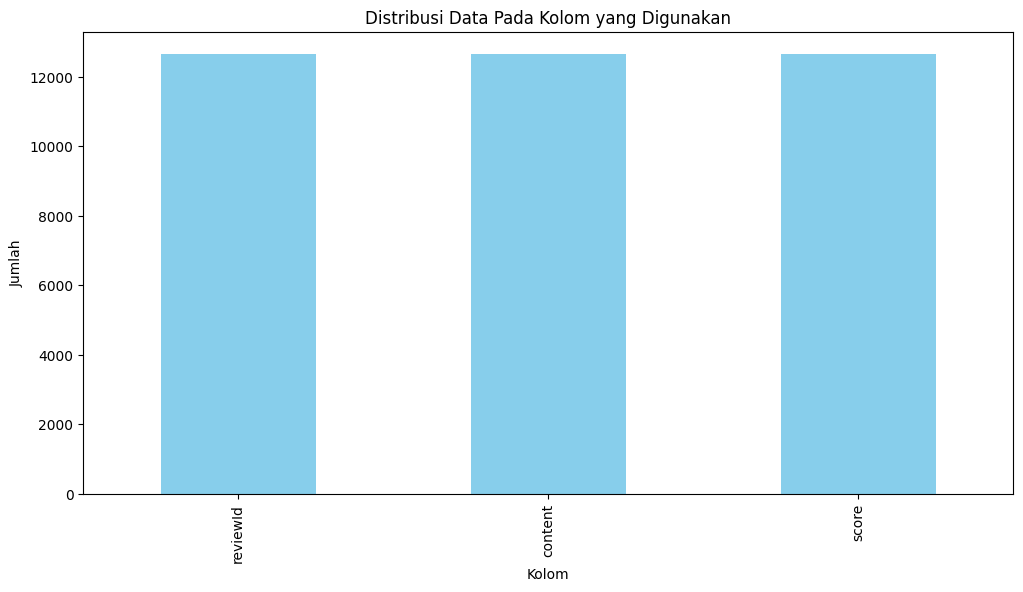

In [18]:
usecol = ['reviewId', 'content', 'score']
plt.figure(figsize=(12,6))
df[usecol].count().plot(kind='bar', color='skyblue')
plt.title('Distribusi Data Pada Kolom yang Digunakan')
plt.ylabel('Jumlah')
plt.xlabel('Kolom')
plt.show()


**Cek Distribusi Score**

score
1    2220
2     330
3     408
4     465
5    9242
Name: count, dtype: int64


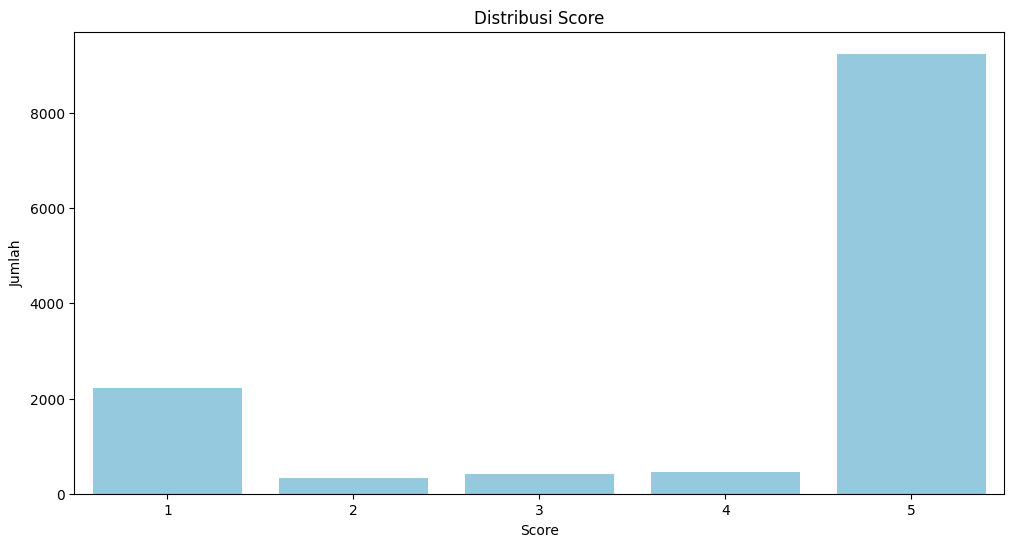

In [19]:
scoredist = df['score'].value_counts().sort_index()
print(scoredist)

plt.figure(figsize=(12, 6))
sns.barplot(
    x = scoredist.index,
    y = scoredist.values,
    color = 'skyblue'
)

plt.title('Distribusi Score')
plt.xlabel('Score')
plt.ylabel('Jumlah')
plt.show()


cek score 3 cenderung ke sentimen apa 

In [21]:
df[df['score'] == 3]['content'].sample(25, random_state=10)

5996     Deposit untuk LTC mahal minimal 0.02, sedangka...
9744     Kenapa ya, opsi deposit Bank BRI kadang ada ka...
111      aplikasi sudah di gunakan KYC berkali-kali dan...
7553     Cukup bagus cuman proses KYC yang terlalu lama...
11402                            Lemoooot bangeeeeet......
4882                         tingkatkan keamanannya rendah
9590     Sekian lama sy staking dan beli koin di sini T...
3015     Triv harganya kok delay banget ya? Sementara a...
9841     Mau beli koin lambat amat ngga kaya exchange s...
9868                    Apl ok. Cuma gak pernah ada bonus.
6954     Bingtang 3 dulu Karena saya beli btc udah di t...
4255     Susah login pengiriman validasi Email selalu t...
5472     min kenapa kalau tiap deposit harus make kode ...
4344     Menurut saya minimal transaksi buat aset kript...
8352     Stiap transaksi masa hrs bayar admin dr beli c...
2203     Aplikasinya lumayan bagus, saya suka, hanya bo...
6575     Halo min gimana ini deposit saya kenapa belum .

Berdasarkan analisis terhadap skor rating, khususnya pada ulasan dengan skor 3, terlihat bahwa skor ini cenderung mengarah ke sentimen negatif. Selain itu, distribusi skor pengguna sangat tidak seimbang, dengan mayoritas ulasan berada di skor 5. Untuk menyederhanakan proses pelabelan dan mengurangi potensi bias terhadap kelas mayoritas, klasifikasi sentimen akan disederhanakan menjadi dua kategori utama:

* Positif: Skor 4–5

* Negatif: Skor 1–3

## Data Understanding Insigth

1. Sumber Data: Ulasan aplikasi `Triv` dari Google Play Store via `google-play-scraper`.

2. Jumlah Data: `12.665` entri dengan `11` kolom.

3. Kolom Penting: `reviewId`, `content`, dan `score` digunakan untuk analisis sentimen.

4. Kebersihan Data: `Tidak ada missing value` pada kolom yang digunakan.

5. Distribusi Skor: Didominasi skor 5 →` data sangat tidak seimbang`.

6. Analisis Skor 3: Cenderung mengandung sentimen `negatif`.

7. Penyederhanaan Label:

    * Positif: Skor 4–5
    * Negatif: Skor 1–3
    * Tujuan Labeling Baru: Mengurangi bias model & menyederhanakan klasifikasi.

# Data Preprocessing
Dalam tahap preprocessing, dilakukan beberapa langkah penting untuk menyiapkan data sebelum masuk ke tahap pemodelan, yaitu:

1. Menghapus kolom yang tidak relevan untuk analisis sentimen.

2. Melabeli data berdasarkan skor ulasan:

    *  Skor 1, 2, 3 → Negatif

    *  Skor 4, 5 → Positif

3. Membersihkan teks ulasan dengan proses:

4. Case folding (mengubah semua huruf menjadi huruf kecil)

5. Menghapus tanda baca, spasi berlebih (whitespace), angka, dan tautan

6. Menghapus kata tidak baku atau tidak penting (stopwords)

7. Stemming (mengubah kata ke bentuk dasarnya)

8. Encoding label target (sentimen) menggunakan LabelEncoder.

9. Membagi dataset menjadi tiga bagian: training, validation, dan testing.

10. Ekstraksi fitur menggunakan metode TF-IDF Vectorizer untuk mengubah teks menjadi representasi numerik.

11. SMOTE (Synthetic Minority Oversampling Technique) diterapkan untuk menyeimbangkan jumlah data antar kelas dengan menambahkan data sintetis pada kelas minoritas.

**1. Menghapus kolom yang tidak dibutuhkan**

In [22]:
data = df[usecol]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12665 entries, 0 to 12664
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  12665 non-null  object
 1   content   12665 non-null  object
 2   score     12665 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 297.0+ KB


Data sudah difilter dan hanya menyisakan kolom-kolom yang relevan untuk proses pemodelan, yaitu:

* reviewId → Sebagai identitas unik setiap ulasan

* content → Teks ulasan yang akan dianalisis (fitur utama)

* score → Digunakan untuk pelabelan sentimen (target)

Langkah ini penting buat memastikan proses analisis dan training model berjalan lebih efisien dan fokus hanya pada informasi yang dibutuhkan. 💡

**2. Data Labelling**

Labeling hanya menggunakan dua kelas: positif dan negatif, berdasarkan analisis awal. Keputusan ini diambil karena beberapa alasan:

1. Distribusi kelas yang tidak seimbang — Kelas netral (skor 3) jumlahnya sangat sedikit, sehingga jika dijadikan kelas terpisah, model berisiko bias terhadap kelas mayoritas (positif).

2. Karakteristik skor 3 — Berdasarkan analisis konten, ulasan dengan skor 3 cenderung mengarah ke sentimen negatif.

3. aktor budaya — Dalam budaya Indonesia, banyak orang cenderung mengekspresikan kritik secara halus atau tidak langsung. Skor netral sering dipilih sebagai cara untuk menyampaikan ketidakpuasan tanpa terkesan kasar atau menghina.

Dengan menyederhanakan label menjadi positif (skor 4–5) dan negatif (skor 1–3), model dapat dilatih dengan lebih seimbang dan menghasilkan prediksi yang lebih stabil.

In [24]:
def label_sentiment(score):
    if score <= 3:
        return 'negatif'
    else:
        return 'positif'

data['sentiment'] = data['score'].apply(label_sentiment)

Cek distribusi label

sentiment
positif    9707
negatif    2958
Name: count, dtype: int64


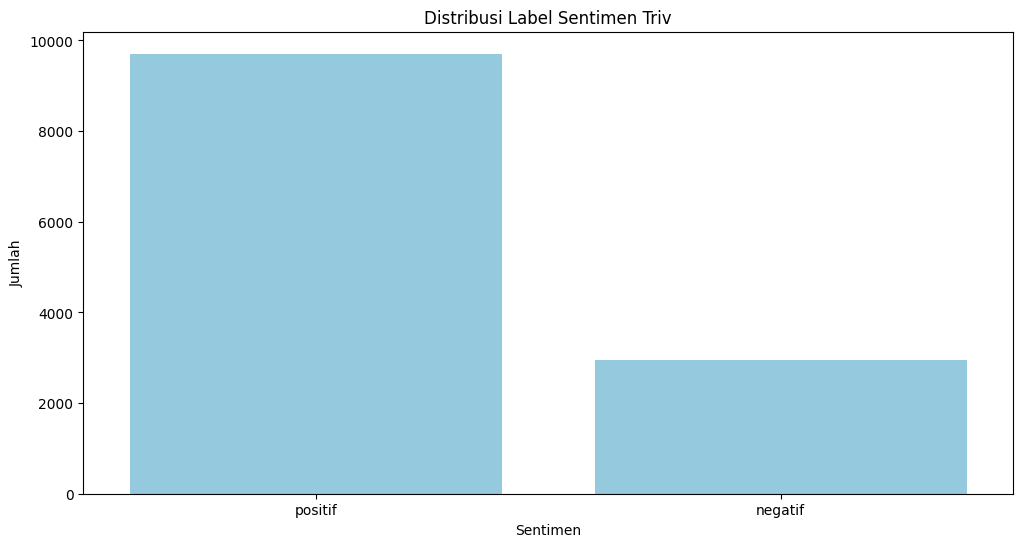

In [25]:
labeldist = data['sentiment'].value_counts()
print(labeldist)

plt.figure(figsize=(12,6))
sns.barplot(
    x=labeldist.index,
    y=labeldist.values,
    color='skyblue'
)
plt.title('Distribusi Label Sentimen Triv')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()


Terlihat di sini distribusi sentimen sangat buruk dan akan mengakibatkan model dapat bias ke kelas yang lebih banyak datanya (positif), dan ini akan membuat prediksi model jadi kacau serta buruk performanya untuk kelas yang datanya sedikit. Oleh karena itu, kita akan menggunakan metode **SMOTE (Synthetic Minority Over-sampling Technique)** sebagai solusi.

SMOTE bekerja dengan **menambahkan data sintetis** pada kelas minoritas (dalam hal ini negatif) berdasarkan jarak antar data existing, bukan hanya sekadar menduplikat. Dengan begitu, data menjadi lebih seimbang tanpa kehilangan keragaman informasi. Proses ini dilakukan **setelah fitur diekstrak** (contohnya lewat TF-IDF), karena SMOTE bekerja pada representasi numerik. Tujuan utamanya adalah agar model tidak hanya belajar dari kelas dominan, tapi juga mampu mengenali pola dari semua kelas dengan adil — meningkatkan recall, precision, dan f1-score terutama untuk kelas minoritas.


**3. Text Cleaning/Membersihkan text**

Untuk memastikan data teks siap dipakai dalam pemodelan machine learning, dilakukan beberapa tahap preprocessing berikut:

* Case Folding & Pembersihan Karakter:

    * Mengubah semua huruf menjadi lowercase.
    * Menghapus mention (@user), hashtag, RT, URL, angka, dan tanda baca.

    * Menghapus spasi berlebih.

* Normalisasi Kata Tidak Baku (Slang):

    * Kata-kata informal atau alay seperti gak, trs, gue, btw, dll. dikonversi ke bentuk bakunya (misalnya: gak → tidak, gue → saya) menggunakan kamus slang yang telah didefinisikan.

* Tokenisasi:

    * Memecah teks menjadi kata-kata terpisah (token) menggunakan nltk.word_tokenize.

* Stopwords Removal:

    * Menghapus kata-kata umum yang tidak memberikan makna penting dalam analisis sentimen, seperti “dan”, “yang”, “the”, “is”, dll. Menggunakan daftar stopwords dari bahasa Indonesia dan Inggris.

* Stemming:

    * Mengubah setiap kata ke bentuk dasarnya menggunakan Sastrawi stemmer. Contoh: “berlari” → “lari”, “membayar” → “bayar”.

* Penggabungan Kembali:

    * Setelah semua proses selesai, token hasil stemming digabung kembali menjadi satu string kalimat.



In [26]:
# Inisiasi Steammer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Inisiasi Stopwords
stop_words = set(stopwords.words('indonesian')).union(stopwords.words('english'))

def clean_text(text):
    """Membersihkan teks dari karakter yang tidak perlu dan melakukan case folding."""
    text = text.lower()  # Case folding
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)  # Hapus mention
    text = re.sub(r'#[A-Za-z0-9]+', ' ', text)  # Hapus hashtag
    text = re.sub(r'RT[\s]', ' ', text)  # Hapus RT
    text = re.sub(r"http\S+", ' ', text)  # Hapus link
    text = re.sub(r'\d+', ' ', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', ' ', text)  
    text = text.strip()  # Hapus spasi di awal dan akhir
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    return text


slangwords = {
    "gak": "tidak", "ga": "tidak", "gk" : "tidak", 'bagu' : 'bagus',"tdk": "tidak", "bgt": "banget", "dgn": "dengan",
    "trs": "terus", "krn": "karena", "udh": "sudah", "sm": "sama", "jg": "juga",
    "tp": "tapi", "bkn": "bukan", "hrs": "harus", "dlm": "dalam", "bgt": "banget",
    "cmn": "cuma", "dpt": "dapat", "sy": "saya", "lg": "lagi", "sblm": "sebelum",
    "skt": "sakit", "ny": "nya", "smpe": "sampai", "bru": "baru", "bs": "bisa",
    "bsa": "bisa", "dpt": "dapat", "tdk": "tidak", "kl": "kalau", "sgt": "sangat", "bug" : "eror",
    "gua" : "saya", "gw" : "saya", "w" : "saya", "anjing" : "sial", "lu" : "kamu", "loe" : "kamu",
    "kcw" : "kecewa", "hr" : "hari", "k" : "aku", "fix" : "perbaiki", "bug" : "eror", "moga" : "semoga", "triv": "triv", "bgt": "banget","ny": "nya",
    "udh": "sudah","pake": "pakai","pakai": "pakai","cuma": "hanya",
    "cmn": "cuma","aja": "saja","ga": "tidak","gak": "tidak","gk": "tidak","nggak": "tidak","gausah": "tidak usah","kalo": "kalau","krn": "karena","bgt": "banget",
    "bngt": "banget","sm": "sama","smpe": "sampai","sampe": "sampai","sy": "saya","gue": "saya",  "gw": "saya","gua": "saya","w": "saya", "lu": "kamu","loe": "kamu",
    "lo": "kamu","trs": "terus","dgn": "dengan", "dpt": "dapat","bsa": "bisa","bs": "bisa","lg": "lagi","tdk": "tidak", "kl": "kalau","jg": "juga","tp": "tapi","bkn": "bukan",
    "hrs": "harus","dlm": "dalam", "skt": "sakit", "bru": "baru", "btw": "ngomong-ngomong", "sih": "", "deh": "", "eh": "","dong": "","makasih": "terima kasih", 
    "mksh": "terima kasih","trims": "terima kasih","trm": "terima", "rekomen": "rekomendasi","fix": "perbaiki","bug": "eror", "anjing": "sial","mantap": "bagus",
    "cepet": "cepat", "bgtu": "begitu", "bener": "benar","gitu": "begitu","gmn": "bagaimana",  "tuh": "","lho": "","kok": "","nih": "","ntap": "mantap",
    "ngerti": "mengerti","ribet": "rumit","make": "menggunakan", "topup": "isi saldo", "e-wallet": "dompet digital","emoney": "uang elektronik",
    "akun": "akun", "iseng": "coba-coba", "sigap": "responsif", "dapetin": "mendapatkan","bikin": "membuat","ajarin": "mengajarkan",  "cobain": "mencoba",
    "ngasih": "memberi", "ngambil": "mengambil","dapet": "dapat","nunggu": "menunggu","ngulang": "mengulang", "kalo": "kalau",
    "moga": "semoga",  "btw": "ngomong-ngomong",  "parah": "buruk", "ok": "oke", "okey": "oke","oke": "baik", "sumpah": "sungguh", "ui" : "tampilan",
    "asu" : "buruk", 'yg' : 'yang', "tggjwabnya" : "tanggung jawab"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

def tokenize_text(text):
    """Memecah teks menjadi token (kata-kata)."""
    return word_tokenize(text)

def remove_stopwords(tokens):
    """Menghapus stopwords dalam bahasa Indonesia dan Inggris."""
    return [word for word in tokens if word not in stop_words]

def stem_text(tokens):
    """Melakukan stemming pada kata-kata dalam teks menggunakan Sastrawi."""
    return [stemmer.stem(word) for word in tokens]

def preprocess_text(text):
    """Melakukan preprocessing lengkap dari pembersihan hingga stemming."""
    text = clean_text(text)
    text = fix_slangwords(text)
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    stemmed_tokens = stem_text(filtered_tokens)
    return ' '.join(stemmed_tokens)  # Mengembalikan hasil sebagai teks kembali

- Tes Fungsi Cleaning

In [27]:
# Contoh penggunaan
df_filtered_sample = data['content'].sample(15, random_state=12) 
pd.set_option('display.max_colwidth', None)  # Menampilkan seluruh teks tanpa batasan

start = time.time()
processed_text = df_filtered_sample.swifter.apply(preprocess_text)
print(processed_text)
end = time.time()
print(f"Processed in {end - start:.4f} seconds")  # Cek waktu proses tiap baris

Pandas Apply:   0%|          | 0/15 [00:00<?, ?it/s]

4849                                       aplikasi bagus gampang hp pokok aplikasi investasi baik recomended banget
7311                                                                           tolong tingkat sistem proses buy sell
9664                                                                                moga aplikasi nya manfaat ya min
2469                                         aplikasi bagus trader mula fitur nya simple rumit mudah erti tampil nya
7333                                                                    manfaat banget ajar trading crypto mula kaya
7120                                                                          bagus si mahal biaya depo exchange lai
2422                  aplikasi keren banget newbie banget proses cepat tunggu pusing bantu aplikasi rekomendeddd dah
11245                                                                                                          tarik
3547                                                            

- Distribusi Kata Sebelum Cleaning

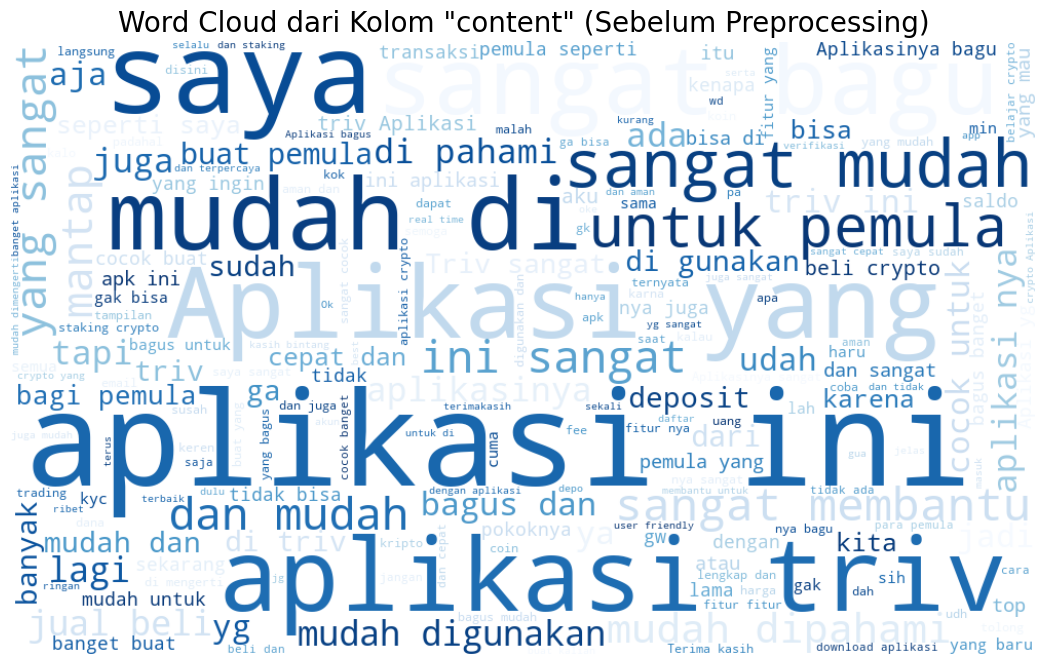

In [28]:
all_words_string = ' '.join(data['content'].dropna().astype(str))

# Membuat WordCloud dari teks asli
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='Blues',random_state=1).generate(all_words_string)

# Menampilkan WordCloud
plt.figure(figsize=(15, 8)) # Ukuran disesuaikan agar tidak terlalu besar
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Menghilangkan sumbu x dan y
plt.title('Word Cloud dari Kolom "content" (Sebelum Preprocessing)', fontsize=20)
plt.show()

* Memulai Proses Cleaning

In [29]:
# Uncoment jika ingin run cleaning

# Proses Preprocess
start = time.time()
data['text_akhir'] = data['content'].swifter.apply(preprocess_text)
end = time.time()
print(f"Processed in {end - start:.4f} seconds") 

Pandas Apply:   0%|          | 0/12665 [00:00<?, ?it/s]

Processed in 614.3258 seconds


data text sudah selesai di cleaning dan normalisasikan!

* Simpan data yang sudah di cleaning dan normalisasikan agar tidak perlu menunggu proses preprocessing yang lama.

In [32]:
# Simpan supaya tidak melakukan preprocessing ulang
data.to_csv('data/dataclean.csv', index= False)

* Muat ulang data

In [33]:
data = pd.read_csv('data/dataclean.csv')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12665 entries, 0 to 12664
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewId    12665 non-null  object
 1   content     12665 non-null  object
 2   score       12665 non-null  int64 
 3   sentiment   12665 non-null  object
 4   text_akhir  12553 non-null  object
dtypes: int64(1), object(4)
memory usage: 494.9+ KB


Terlihat ada missing value di text akhir, jadi kita akan clean data yang kosong terlebih dahulu agar bisa lanjut ke proses selanjutnya.

* Menghapus data yang kosong

In [35]:
data.dropna(inplace=True)
print('Data is clean now!!')

Data is clean now!!


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12553 entries, 0 to 12657
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewId    12553 non-null  object
 1   content     12553 non-null  object
 2   score       12553 non-null  int64 
 3   sentiment   12553 non-null  object
 4   text_akhir  12553 non-null  object
dtypes: int64(1), object(4)
memory usage: 588.4+ KB


data sudah bersih! :D

* melihat sampel data setelah cleaning

In [37]:
data.text_akhir.sample(10)

9339                                                                                                                   layan csnya muas moga bagus triv
2163                                       aplikasi bagus bantu transaksi fitur fitur dalam lengkap ngga eror lag cocok transaksi rekomendasi pakai apk
6812                                                                                                                                     kripto kembang
7924                                                                                                            coba dl sdh coba transfer staking bagus
5548                                                                                               keren aplikasi simple mudah mula ajar trading crypto
11538                                                                                                                                            normal
2171                                          aplikasi guna nabung koin staking bunga ma

In [64]:
data

reviewId  \
0      41dff01f-cf34-4128-9369-aad8cc1a0d2e   
1      b1fa53fe-fc80-4d7c-8fb4-7ada6ed46d0e   
2      05d3274d-d0ec-4777-86a3-d3259b91a224   
3      63d8f291-045f-4e47-93ab-cc069aad1425   
4      bb4df9c8-3276-4259-aa86-526399a86fdb   
...                                     ...   
12652  cea20bec-09b3-4c49-9f2c-181ead60c387   
12653  62793669-3c34-40cd-b9bf-f09f483895c5   
12654  d2a0dfc9-03ed-4d3a-b234-7f040f2b31a3   
12656  bb93d78f-e029-4325-afd6-04b4d1d9acb6   
12657  09f66df5-ba8f-4b64-b3aa-8fbc1b87210c   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         content  \
0      Triv adalah aplikasi yang luar biasa untuk bertransaksi! Sebagai seorang pedagang, saya merasa aplikasi ini sangat membantu dengan berbagai pilihan deposit yang membuat prosesnya lancar dan nyaman. Antarmuka dan menunya sangat ramah pengguna, sehingga mudah dinavigasi bahkan untuk pemula. Pengalaman saya menggunakan Triv sangat luar biasa—transaksi cepat, fitur yang andal, dan semua yang Anda butuhkan untuk perdagangan aset digital yang lancar. Sangat direkomendasikan!   
1                                                       Saya sudah menggunakan Triv selama beberapa bulan dan sangat puas dengan layanannya. Proses beli dan jual aset kripto sangat cepat dan mudah. Antarmuka aplikasinya juga user-friendly, cocok untuk pemula maupun yang sudah berpengalaman. Verifikasi akun cepat, dan customer service responsif ketika saya ada kendala. Fitur-fitur seperti top-up e-wallet dan transfer bank juga sangat praktis. Terpercaya dan recommended banget!   
2                                                                      Saya sudah menggunakan Triv selama beberapa bulan dan sangat puas dengan layanannya. Proses transaksi cepat, user interface-nya ramah pengguna, dan banyak pilihan aset kripto serta e-money. Customer service juga responsif dan membantu. Cocok untuk pemula maupun yang sudah berpengalaman. Aplikasi ini benar-benar memudahkan saya dalam mengelola aset digital dan keuangan. Terus tingkatkan layanannya, Triv! 💪🔥   
3                                                                                                                                                                                                                        Aplikasi Triv sangat membantu untuk jual beli aset kripto dengan cepat dan aman. Tampilannya sederhana, jadi mudah digunakan bahkan untuk pemula. Proses transaksi juga cepat dan customer service-nya responsif. Cocok banget buat yang ingin mulai investasi digital!   
4                                                                              Udah pakai Triv selama beberapa bulan dan sangat puas. Proses beli cryptonya cepat dan mudah, spreadnya juga cukup rendah dibanding aplikasi lain. Fitur stakingnya sangat membantu buat dapetin passive income harian. UI/UX nya simpel dan nyaman digunakan, cocok banget buat pemula maupun yang udah terbiasa trading. Update terakhir juga bikin aplikasinya makin lancar dan stabil. Recommended banget! 🔥💯   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ...   
12652                                                                             

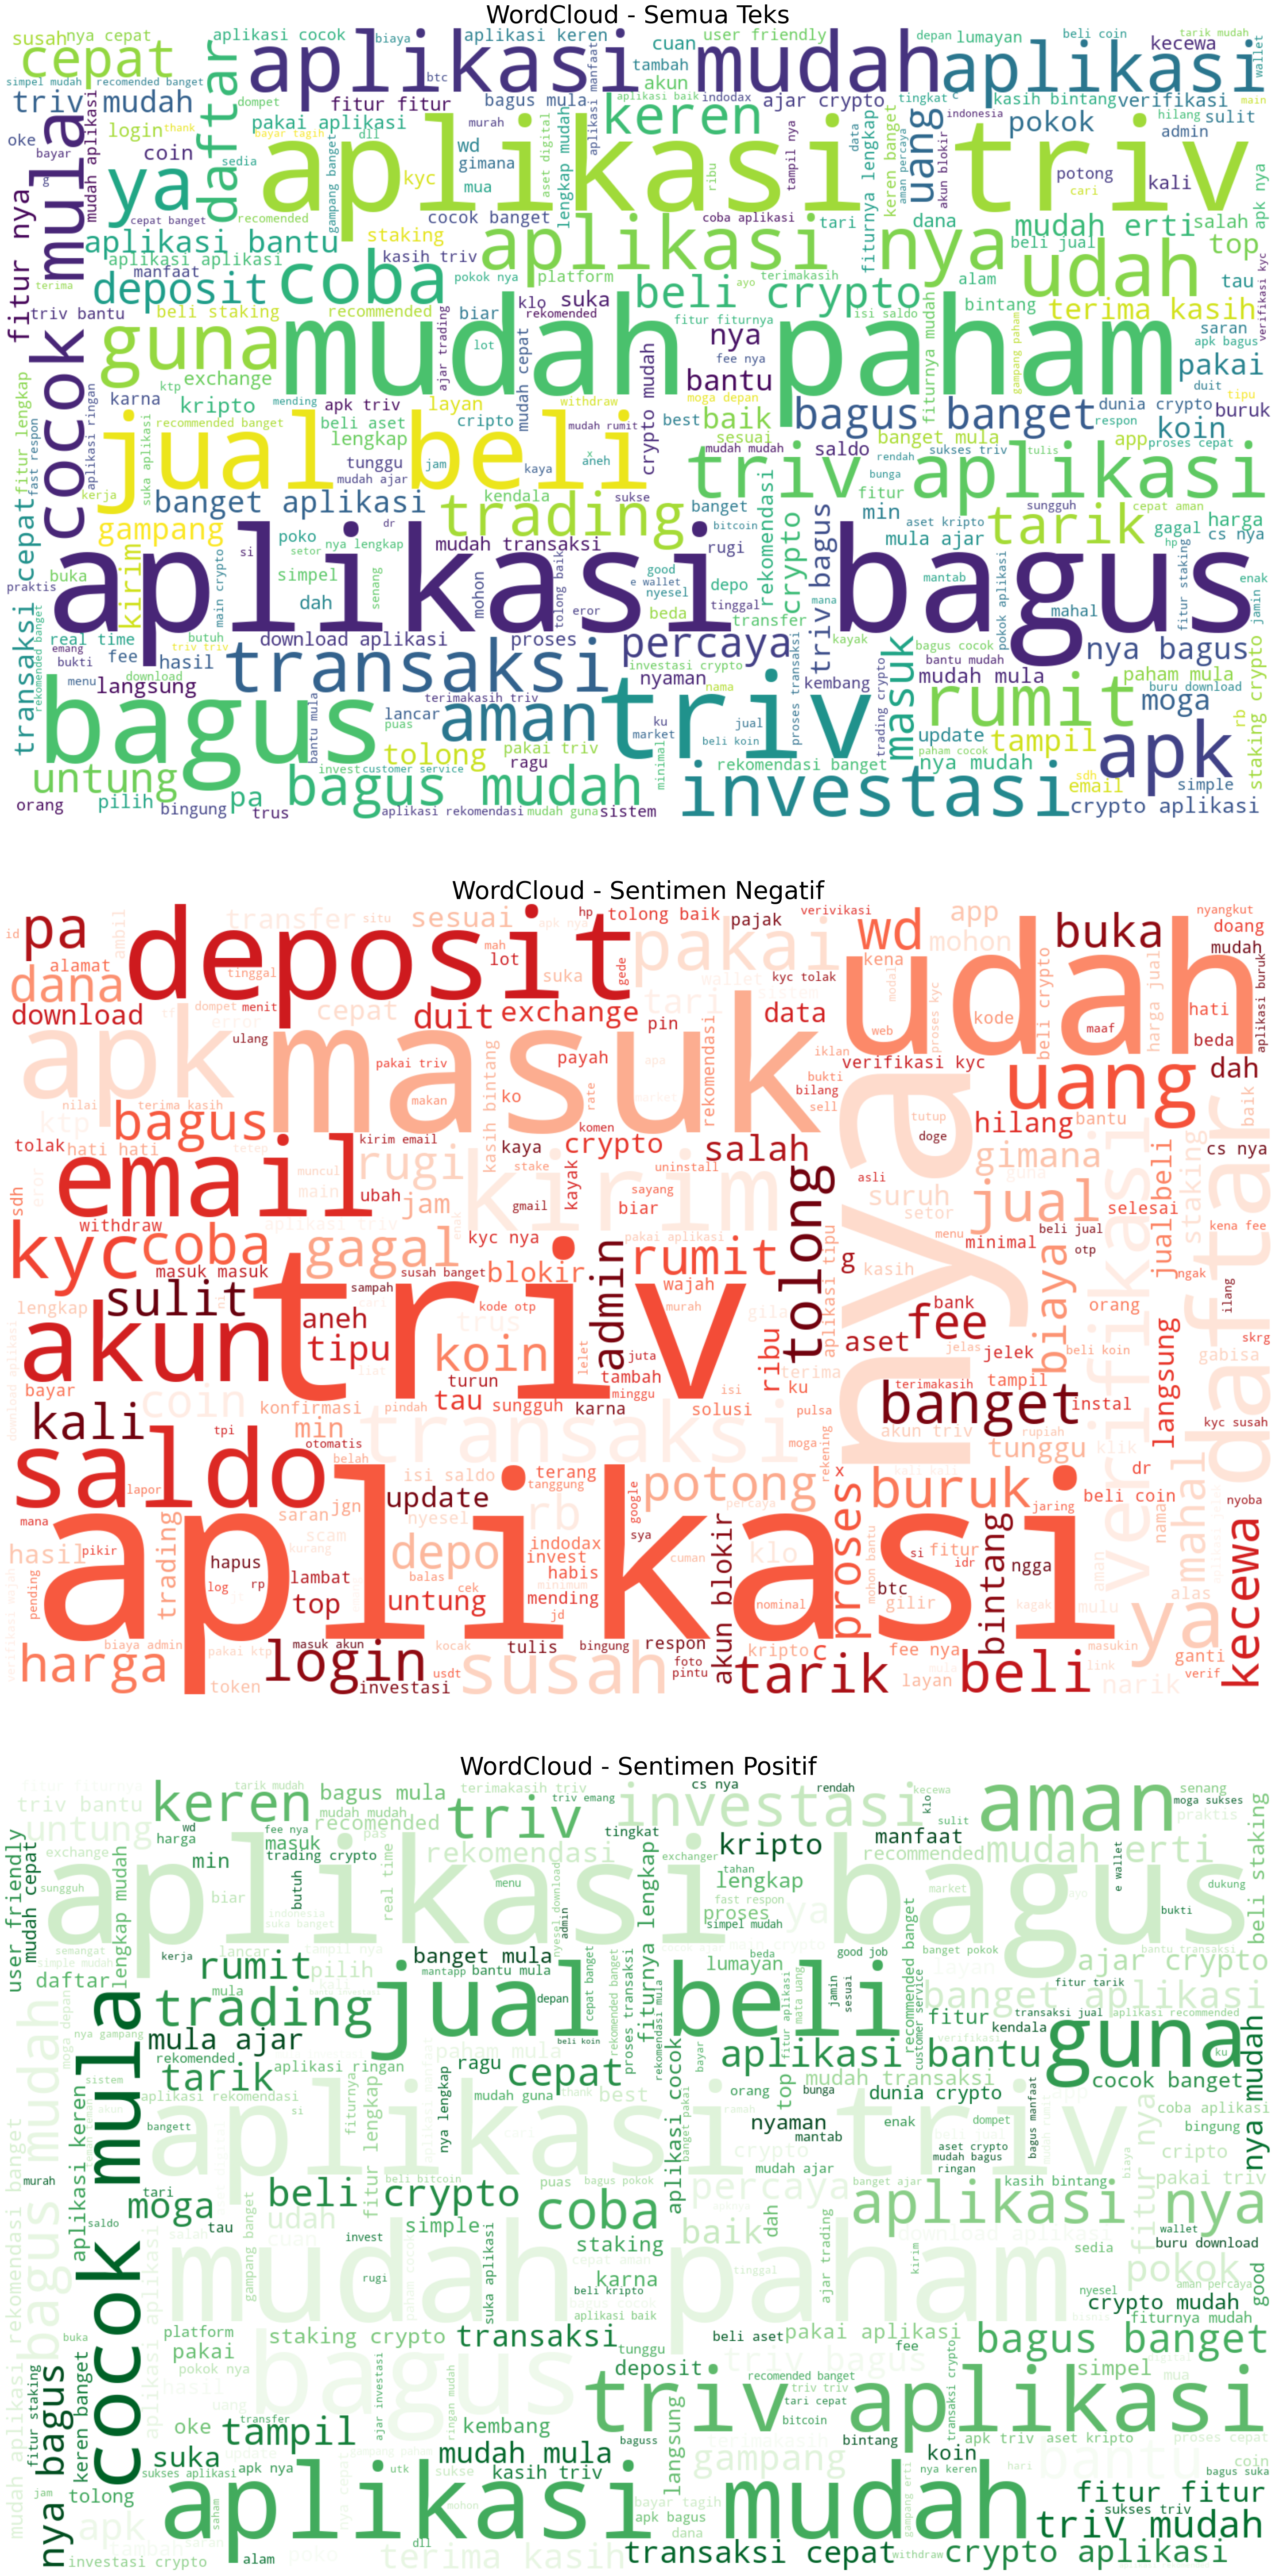

In [70]:
# Gabungin teks untuk semua kategori
all_text = ' '.join(data['text_akhir'])
neg_text = ' '.join(data[data['sentiment'] == 'negatif']['text_akhir'])
pos_text = ' '.join(data[data['sentiment'] == 'positif']['text_akhir'])

# Bikin figure vertikal besar (lebar 30 inch, tinggi 60 inch)
plt.figure(figsize=(30, 60))

# WordCloud Semua Teks
plt.subplot(3, 1, 1)
wordcloud_all = WordCloud(width=1600, height=1000, background_color='white', max_words=300).generate(all_text)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Semua Teks', fontsize=40)

# WordCloud Sentimen Negatif
plt.subplot(3, 1, 2)
wordcloud_neg = WordCloud(width=1600, height=1000, background_color='white', colormap='Reds', max_words=300).generate(neg_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentimen Negatif', fontsize=40)

# WordCloud Sentimen Positif
plt.subplot(3, 1, 3)
wordcloud_pos = WordCloud(width=1600, height=1000, background_color='white', colormap='Greens', max_words=300).generate(pos_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentimen Positif', fontsize=40)

plt.tight_layout(pad=5)
plt.show()


Setelah melalui proses preprocessing, teks menjadi jauh lebih bersih dan terstruktur dibandingkan sebelum dilakukan pembersihan.
Teks yang awalnya mengandung noise seperti emoji, tanda baca, singkatan gaul, dan karakter tidak penting kini telah distandarkan, sehingga lebih siap untuk dianalisis oleh model machine learning.

**4. Label Encoding**

Label encoding adalah proses mengubah label kategorikal seperti "positif" dan "negatif" menjadi format numerik, misalnya:

* positif → 1

* negatif → 0

Hal ini penting dilakukan karena model machine learning hanya bisa memproses data numerik, bukan string atau teks.

In [39]:
data.head()

reviewId  \
0  41dff01f-cf34-4128-9369-aad8cc1a0d2e   
1  b1fa53fe-fc80-4d7c-8fb4-7ada6ed46d0e   
2  05d3274d-d0ec-4777-86a3-d3259b91a224   
3  63d8f291-045f-4e47-93ab-cc069aad1425   
4  bb4df9c8-3276-4259-aa86-526399a86fdb   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     content  \
0  Triv adalah aplikasi yang luar biasa untuk bertransaksi! Sebagai seorang pedagang, saya merasa aplikasi ini sangat membantu dengan berbagai pilihan deposit yang membuat prosesnya lancar dan nyaman. Antarmuka dan menunya sangat ramah pengguna, sehingga mudah dinavigasi bahkan untuk pemula. Pengalaman saya menggunakan Triv sangat luar biasa—transaksi cepat, fitur yang andal, dan semua yang Anda butuhkan untuk perdagangan aset digital yang lancar. Sangat direkomendasikan!   
1                                                   Saya sudah menggunakan Triv selama beberapa bulan dan sangat puas dengan layanannya. Proses beli dan jual aset kripto sangat cepat dan mudah. Antarmuka aplikasinya juga user-friendly, cocok untuk pemula maupun yang sudah berpengalaman. Verifikasi akun cepat, dan customer service responsif ketika saya ada kendala. Fitur-fitur seperti top-up e-wallet dan transfer bank juga sangat praktis. Terpercaya dan recommended banget!   
2                                                                  Saya sudah menggunakan Triv selama beberapa bulan dan sangat puas dengan layanannya. Proses transaksi cepat, user interface-nya ramah pengguna, dan banyak pilihan aset kripto serta e-money. Customer service juga responsif dan membantu. Cocok untuk pemula maupun yang sudah berpengalaman. Aplikasi ini benar-benar memudahkan saya dalam mengelola aset digital dan keuangan. Terus tingkatkan layanannya, Triv! 💪🔥   
3                                                                                                                                                                                                                    Aplikasi Triv sangat membantu untuk jual beli aset kripto dengan cepat dan aman. Tampilannya sederhana, jadi mudah digunakan bahkan untuk pemula. Proses transaksi juga cepat dan customer service-nya responsif. Cocok banget buat yang ingin mulai investasi digital!   
4                                                                          Udah pakai Triv selama beberapa bulan dan sangat puas. Proses beli cryptonya cepat dan mudah, spreadnya juga cukup rendah dibanding aplikasi lain. Fitur stakingnya sangat membantu buat dapetin passive income harian. UI/UX nya simpel dan nyaman digunakan, cocok banget buat pemula maupun yang udah terbiasa trading. Update terakhir juga bikin aplikasinya makin lancar dan stabil. Recommended banget! 🔥💯   

   score sentiment  \
0      5   positif   
1      5   positif   
2      5   positif   
3      5   positif   
4      5   positif   

                                                                                                                                                                                                                                           text_akhir  
0                                   triv aplikasi transaksi dagang aplikasi bantu pilih deposit proses lancar nyaman antarmuka menu ramah guna mudah navigasi mula alam triv transaksi cepat fitur andal butuh dagang aset digital lancar rekomendasi  
1        triv puas layan proses beli jual aset kripto cepat mudah antarmuka aplikasi user friendly cocok mula alam verifikasi akun cepat customer service responsif kendala fitur fitur top e wallet transfer bank praktis percaya recommended banget  
2             

In [40]:
le = LabelEncoder()
data['sentimen_encode'] = le.fit_transform(data['sentiment'])

In [41]:
data.head()

reviewId  \
0  41dff01f-cf34-4128-9369-aad8cc1a0d2e   
1  b1fa53fe-fc80-4d7c-8fb4-7ada6ed46d0e   
2  05d3274d-d0ec-4777-86a3-d3259b91a224   
3  63d8f291-045f-4e47-93ab-cc069aad1425   
4  bb4df9c8-3276-4259-aa86-526399a86fdb   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     content  \
0  Triv adalah aplikasi yang luar biasa untuk bertransaksi! Sebagai seorang pedagang, saya merasa aplikasi ini sangat membantu dengan berbagai pilihan deposit yang membuat prosesnya lancar dan nyaman. Antarmuka dan menunya sangat ramah pengguna, sehingga mudah dinavigasi bahkan untuk pemula. Pengalaman saya menggunakan Triv sangat luar biasa—transaksi cepat, fitur yang andal, dan semua yang Anda butuhkan untuk perdagangan aset digital yang lancar. Sangat direkomendasikan!   
1                                                   Saya sudah menggunakan Triv selama beberapa bulan dan sangat puas dengan layanannya. Proses beli dan jual aset kripto sangat cepat dan mudah. Antarmuka aplikasinya juga user-friendly, cocok untuk pemula maupun yang sudah berpengalaman. Verifikasi akun cepat, dan customer service responsif ketika saya ada kendala. Fitur-fitur seperti top-up e-wallet dan transfer bank juga sangat praktis. Terpercaya dan recommended banget!   
2                                                                  Saya sudah menggunakan Triv selama beberapa bulan dan sangat puas dengan layanannya. Proses transaksi cepat, user interface-nya ramah pengguna, dan banyak pilihan aset kripto serta e-money. Customer service juga responsif dan membantu. Cocok untuk pemula maupun yang sudah berpengalaman. Aplikasi ini benar-benar memudahkan saya dalam mengelola aset digital dan keuangan. Terus tingkatkan layanannya, Triv! 💪🔥   
3                                                                                                                                                                                                                    Aplikasi Triv sangat membantu untuk jual beli aset kripto dengan cepat dan aman. Tampilannya sederhana, jadi mudah digunakan bahkan untuk pemula. Proses transaksi juga cepat dan customer service-nya responsif. Cocok banget buat yang ingin mulai investasi digital!   
4                                                                          Udah pakai Triv selama beberapa bulan dan sangat puas. Proses beli cryptonya cepat dan mudah, spreadnya juga cukup rendah dibanding aplikasi lain. Fitur stakingnya sangat membantu buat dapetin passive income harian. UI/UX nya simpel dan nyaman digunakan, cocok banget buat pemula maupun yang udah terbiasa trading. Update terakhir juga bikin aplikasinya makin lancar dan stabil. Recommended banget! 🔥💯   

   score sentiment  \
0      5   positif   
1      5   positif   
2      5   positif   
3      5   positif   
4      5   positif   

                                                                                                                                                                                                                                           text_akhir  \
0                                   triv aplikasi transaksi dagang aplikasi bantu pilih deposit proses lancar nyaman antarmuka menu ramah guna mudah navigasi mula alam triv transaksi cepat fitur andal butuh dagang aset digital lancar rekomendasi   
1        triv puas layan proses beli jual aset kripto cepat mudah antarmuka aplikasi user friendly cocok mula alam verifikasi akun cepat customer service responsif kendala fitur fitur top e wallet transfer bank praktis percaya recommended banget   
2          

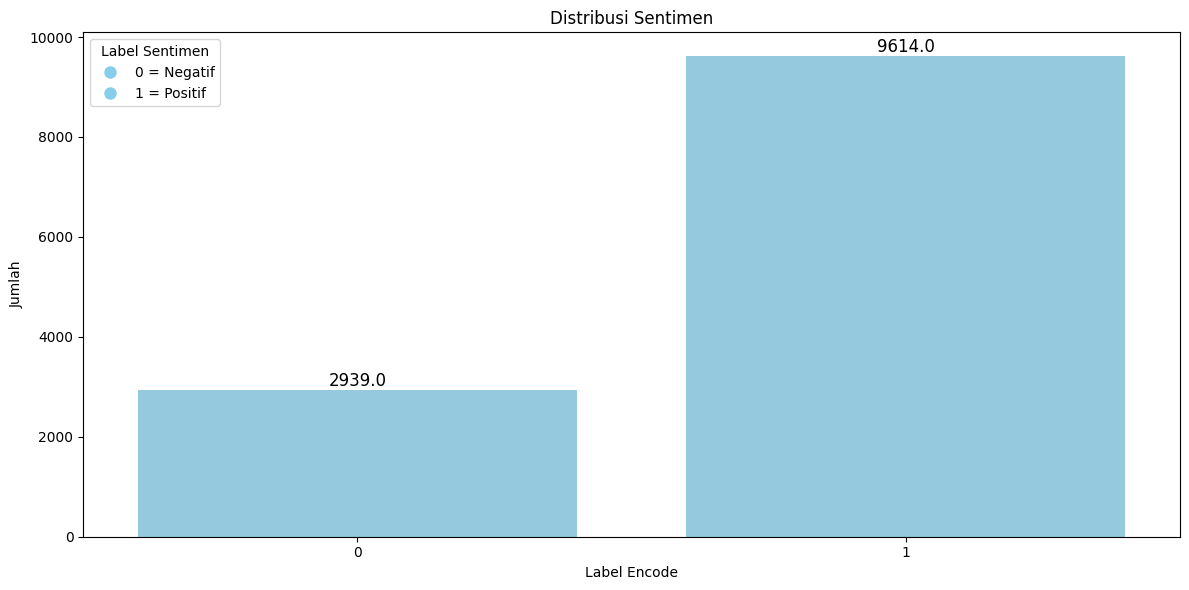

In [71]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=data,
    x='sentimen_encode',
    color='skyblue'
)

# Tambahin nilai di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

# Tambahin legend manual
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='0 = Negatif', markerfacecolor='skyblue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='1 = Positif', markerfacecolor='skyblue', markersize=10)
    ],
    title='Label Sentimen'
)

plt.title('Distribusi Sentimen')
plt.xlabel('Label Encode')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


Berikut adalah distribusi label hasil preprocessing:

- **0 (Negatif)** : 2.939 baris data  
- **1 (Positif)** : 9.726 baris data 

**5. Data Splitting**

Proses pembagian data dilakukan sebelum preprocessing lanjutan untuk menghindari kebocoran data dan memastikan hasil evaluasi yang adil.  
Dataset dibagi menjadi tiga bagian:

- **Train (60%)** : Digunakan untuk melatih model.
- **Validation (20%)** : Digunakan untuk menguji performa model saat training.
- **Test (20%)** : Digunakan untuk mengevaluasi model pada data yang belum pernah dilihat sebelumnya.

Pembagian ini membantu memastikan bahwa model tidak hanya bagus pada data latih, tapi juga mampu generalisasi ke data baru.

In [ ]:
# Pisahkan Feature dan Label
X = data['text_akhir']  # Fitur
y = data['sentimen_encode']  # Label

#Bagi menjadi 60% Training, 20% Validation, 20% Testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y, shuffle= True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train :", len(X_train))
print("Val   :", len(X_val))
print("Test  :", len(X_test))

Train : 7531
Val   : 2511
Test  : 2511


**6. Feature Extraction : TF-IDF**

TF-IDF adalah metode statistik untuk menilai seberapa penting sebuah kata dalam dokumen tertentu relatif terhadap seluruh kumpulan dokumen. TF (Term Frequency) mengukur seberapa sering kata muncul dalam dokumen, sedangkan IDF (Inverse Document Frequency) mengukur keunikan kata di seluruh dokumen. Semakin sering kata muncul di dokumen tertentu dan semakin jarang muncul di dokumen lain, maka nilai TF-IDF-nya akan semakin tinggi. Teknik ini berguna untuk menyoroti kata-kata yang bermakna dan mengurangi bobot kata yang terlalu umum.

In [45]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    ngram_range=(1,2),    # unigram + bigram
)

# Fit & transform hanya ke X_train
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform val & test pakai fit dari train
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

**7. SMOTE**

SMOTE adalah teknik oversampling yang digunakan untuk mengatasi ketidakseimbangan kelas dalam dataset. Alih-alih hanya menduplikasi data dari kelas minoritas, SMOTE membuat contoh sintetis baru dengan cara menginterpolasi data yang ada. Tujuannya adalah agar distribusi label menjadi lebih seimbang, sehingga model tidak bias terhadap kelas mayoritas dan dapat belajar lebih adil dari semua kelas.

In [46]:
from collections import Counter

# Sebelum SMOTE
print("Distribusi sebelum SMOTE:", Counter(y_train))

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_smote))

Distribusi sebelum SMOTE: Counter({1: 5768, 0: 1763})
Distribusi setelah SMOTE: Counter({1: 5768, 0: 5768})


Terlihat bahwa setelah dilakukan SMOTE, distribusi label kini sudah merata dibandingkan sebelumnya yang sangat timpang.

# Modeling

Pemodelan dilakukan menggunakan tiga algoritma populer dalam klasifikasi teks:

* Naive Bayes
    Model probabilistik sederhana yang cocok untuk data teks karena mengasumsikan bahwa setiap fitur (kata) bersifat independen. Meskipun asumsi ini sering tidak sepenuhnya benar, Naive Bayes sering memberi hasil baik dan cepat.

* Random Forest
    Merupakan ensemble dari banyak decision tree. Setiap tree dilatih dari subset data yang berbeda, lalu hasilnya digabungkan. Model ini lebih kuat terhadap overfitting dan bisa menangani data non-linear dengan baik.

* Support Vector Machine (SVM)
    SVM mencari hyperplane terbaik yang memisahkan kelas dalam ruang fitur. Cocok untuk data dengan dimensi tinggi seperti hasil ekstraksi TF-IDF karena mampu membentuk batas klasifikasi yang tegas.

Untuk training, digunakan teknik cross-validation agar seluruh data digunakan secara bergantian dalam proses training dan validasi. Ini membantu memastikan model tidak overfitting terhadap data tertentu.

Model dievaluasi menggunakan metrik berikut:

* Akurasi: seberapa banyak prediksi yang benar secara keseluruhan.

* Standar deviasi: variasi hasil akurasi antar lipatan cross-validation.

* Classification Report: precision, recall, dan f1-score untuk setiap label sentimen.

Tujuan tahap ini adalah memilih model baseline terbaik sebelum dilakukan tuning hyperparameter.

In [47]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(class_weight='balanced')
}

# TRAINING MENGGUNAKAN CROSS VALIDATION
for name, model in models.items():
    print(f"🔍 Evaluating {name} with 5-fold cross-validation...")
    
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Val Accuracy Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")
    print("-" * 50)

🔍 Evaluating Naive Bayes with 5-fold cross-validation...
Cross-Val Accuracy Mean: 0.8534 | Std: 0.0039
--------------------------------------------------
🔍 Evaluating Random Forest with 5-fold cross-validation...
Cross-Val Accuracy Mean: 0.8991 | Std: 0.0039
--------------------------------------------------
🔍 Evaluating SVM with 5-fold cross-validation...
Cross-Val Accuracy Mean: 0.9162 | Std: 0.0034
--------------------------------------------------


Evaluasi Model Sementara

In [48]:
# CEK PERFORMA MODEL PADA DATA VALIDATION
for name, model in models.items():
    print(f"📊 Final model training for {name}")
    
    model.fit(X_train_tfidf, y_train, )  # train model
    y_pred_val = model.predict(X_val_tfidf)  # prediksi di validation
    
    print(f"\n🔬 Evaluation on Validation Set ({name})")
    print("Accuracy :", accuracy_score(y_val, y_pred_val))
    print("Classification Report:")
    print(classification_report(y_val, y_pred_val))
    print("=" * 60)

📊 Final model training for Naive Bayes

🔬 Evaluation on Validation Set (Naive Bayes)
Accuracy : 0.8554360812425329
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.43      0.58       588
           1       0.85      0.98      0.91      1923

    accuracy                           0.86      2511
   macro avg       0.87      0.71      0.75      2511
weighted avg       0.86      0.86      0.84      2511

📊 Final model training for Random Forest

🔬 Evaluation on Validation Set (Random Forest)
Accuracy : 0.8976503385105535
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       588
           1       0.92      0.95      0.93      1923

    accuracy                           0.90      2511
   macro avg       0.87      0.84      0.85      2511
weighted avg       0.90      0.90      0.90      2511

📊 Final model training for SVM

🔬 Evaluation on Validation Set (SV

Berdasarkan hasil evaluasi, SVM (Support Vector Machine) menghasilkan performa terbaik dibandingkan model lainnya, dengan F1-score tertinggi secara konsisten. Oleh karena itu, SVM dipilih sebagai baseline model utama.

Untuk mengoptimalkan performa lebih lanjut, akan dilakukan proses Hyperparameter Tuning menggunakan Bayesian Search. Metode ini lebih efisien dibanding grid search karena mengeksplorasi ruang parameter secara cerdas dan terarah, sehingga memungkinkan model mencapai performa terbaiknya dengan lebih cepat.

## Hyperparameter Optimization

Untuk meningkatkan performa dari model SVM, dilakukan Hyperparameter Tuning menggunakan metode Bayesian Search. Metode ini bekerja dengan mengeksplorasi kombinasi parameter secara cerdas dan efisien dibandingkan grid/random search.

Parameter yang dicari:

* C: Regularization strength (log-uniform)

* gamma: Kernel coefficient (log-uniform)

* kernel: Jenis kernel (linear atau rbf)

Proses tuning dilakukan dengan Stratified K-Fold Cross Validation sebanyak 5 fold, dan metrik yang digunakan adalah F1-Score (weighted), karena data tidak seimbang.

In [51]:
# Setup model
svm_model = SVC()

# Hyperparameter search space
param_space = {
    'C': (1e-3, 100.0, 'log-uniform'),
    'gamma': (1e-4, 1.0, 'log-uniform'),
    'kernel': ['rbf', 'linear']
}

# K-Fold cross-validation stratified
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=svm_model,
    search_spaces=param_space,
    n_iter=30,  # bisa ditambah biar makin optimal
    scoring='f1_weighted',  # pakai f1 karena unbalanced
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit ke data training TF-IDF
bayes_search.fit(X_train_tfidf, y_train)

# Print hasil terbaik
print("Best Parameters:", bayes_search.best_params_)
print("Best F1 Score:", bayes_search.best_score_)

# Model final
final_model = bayes_search.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

**Hasil tuning:**

* Best Parameters: {'C': 1.0458, 'gamma': 0.000158, 'kernel': 'linear'}

* Best F1 Score: 0.9126

Model SVM dengan konfigurasi optimal ini selanjutnya akan digunakan sebagai model final untuk proses prediksi dan evaluasi.



# Model Evaluation

**1. Evaluasi Model di Data Validasi**

Setelah proses pelatihan selesai dan model terbaik (SVM dengan hasil tuning) diperoleh, langkah selanjutnya adalah mengevaluasi performa model terhadap data validasi. Data validasi digunakan untuk menguji generalisasi model terhadap data yang tidak digunakan selama pelatihan.

In [52]:
# Model Evaluation
y_pred_val = final_model.predict(X_val_tfidf)

print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))


Accuracy: 0.9151732377538829
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       588
           1       0.95      0.94      0.94      1923

    accuracy                           0.92      2511
   macro avg       0.88      0.88      0.88      2511
weighted avg       0.92      0.92      0.92      2511



**Evaluasi Model Validation**

Model hasil tuning (SVM) dievaluasi menggunakan data validasi untuk mengukur kemampuannya dalam menggeneralisasi data baru yang belum pernah dilihat sebelumnya.

**📈 Hasil Evaluasi:**

* Accuracy: 91.5%

* Macro F1-Score: 88%

**📊 Classification Report:**

| Label           | Precision | Recall | F1-Score | Support |
| --------------- | --------- | ------ | -------- | ------- |
| **0 (Negatif)** | 0.82      | 0.82   | 0.82     | 588     |
| **1 (Positif)** | 0.95      | 0.94   | 0.94     | 1923    |

📌 Insight:

* Model punya performa sangat baik terutama di kelas mayoritas (positif).

* Kelas minoritas (negatif) juga terprediksi cukup stabil dengan F1-Score 82%.

* Akurasi tinggi menunjukkan model cukup konsisten dan tidak overfitting.

Langkah selanjutnya adalah menguji model di data test untuk mengevaluasi performa akhirnya.



**2. Evaluasi Model di Data Test**

Setelah performa model dievaluasi pada data validasi, langkah selanjutnya adalah menguji model pada data test. Data test berfungsi sebagai benchmark akhir untuk mengukur kemampuan generalisasi model terhadap data yang benar-benar baru dan tidak pernah dilibatkan dalam proses pelatihan maupun validasi.

Model terbaik yang telah didapatkan melalui proses hyperparameter tuning (SVM) kemudian diuji terhadap data test untuk melihat seberapa baik performanya di kondisi nyata.

In [55]:
# Prediksi di test
y_pred_test = final_model.predict(X_test_tfidf)

print("🔍 Evaluation on Test Data")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))


🔍 Evaluation on Test Data
Accuracy: 0.9239346873755476
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       588
           1       0.95      0.95      0.95      1923

    accuracy                           0.92      2511
   macro avg       0.90      0.89      0.89      2511
weighted avg       0.92      0.92      0.92      2511



**Evaluasi Model Test**

Model terbaik hasil tuning (SVM) kemudian diuji pada data test untuk mengukur performa akhirnya terhadap data yang benar-benar baru dan tidak pernah digunakan selama proses pelatihan maupun validasi.

**📈 Hasil Evaluasi:**

* Accuracy: 92.4%

* Macro F1-Score: 89%

**📊 Classification Report:**

| Label       | Precision | Recall | F1-Score | Support |
| ----------- | --------- | ------ | -------- | ------- |
| 0 (Negatif) | 0.85      | 0.83   | 0.84     | 588     |
| 1 (Positif) | 0.95      | 0.95   | 0.95     | 1923    |

📌 Insight:

* Model berhasil mempertahankan performa tinggi di data test, menunjukkan generalizability yang baik.

* F1-Score untuk kelas negatif meningkat sedikit dibandingkan evaluasi di data validasi.

* Hasil ini menunjukkan bahwa model tidak hanya bekerja baik di data training/validation, tapi juga pada data yang benar-benar baru — artinya tidak overfitting dan siap digunakan secara nyata.

Langkah selanjutnya: Model ini bisa disimpan dan digunakan untuk prediksi real-time atau deployment ke aplikasi.



**3. Save model untuk deployment**

In [74]:
import joblib
import os

# Nama direktori untuk menyimpan model
dir_name = 'model'

# Langkah 1: Pastikan direktori ada, jika tidak, buat baru
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    print(f"Direktori '{dir_name}' berhasil dibuat.")

# Langkah 2: Simpan model dan vectorizer menggunakan os.path.join
try:
    # Simpan model terbaik (hasil tuning)
    joblib.dump(final_model, os.path.join(dir_name, 'model_svm_sentimen.pkl'))
    print("✅ Model berhasil disimpan di 'model/model_svm_sentimen.pkl'")

    # Simpan TF-IDF vectorizer-nya juga
    joblib.dump(tfidf, os.path.join(dir_name, 'tfidf_vectorizer.pkl'))
    print("✅ TF-IDF vectorizer berhasil disimpan di 'model/tfidf_vectorizer.pkl'")

except NameError as e:
    print(f"Error: Pastikan variabel seperti 'final_model' dan 'tfidf' sudah terdefinisi sebelum menjalankan kode ini.")
except Exception as e:
    print(f"Terjadi error saat menyimpan file: {e}")


✅ Model berhasil disimpan di 'model/model_svm_sentimen.pkl'
✅ TF-IDF vectorizer berhasil disimpan di 'model/tfidf_vectorizer.pkl'


**4. Load dan test model ke data baru**

In [76]:
# Load model
model_loaded = joblib.load('model/model_svm_sentimen.pkl')

# Load vectorizer
tfidf_loaded = joblib.load('model/tfidf_vectorizer.pkl')

# Contoh prediksi baru:
sample_text = ["Good aplikasi berjalan baik!"]
sample_text_tfidf = tfidf_loaded.transform(sample_text)
pred = model_loaded.predict(sample_text_tfidf)
print("Prediksi Sentimen:", pred)

Prediksi Sentimen: [1]


# Summary

Proyek ini sukses mengembangkan model Machine Learning (SVM) untuk klasifikasi sentimen ulasan aplikasi Triv dengan `akurasi akhir 92.4%` pada data uji.

Dengan menangani data yang tidak seimbang menggunakan SMOTE dan melakukan preprocessing teks yang mendalam, model ini terbukti efektif dalam memprediksi sentimen positif `(F1-Score 95%)` sekaligus kuat dalam mendeteksi sentimen negatif `(F1-Score 84%)`.

Model final telah disimpan dalam format .pkl dan siap untuk diimplementasikan.